## Load modules

In [156]:
import numpy as np
import imp
import ens_snapshot_tools as ens
import matplotlib.pyplot as plt

# for debugging
imp.reload(ens)

IndentationError: unindent does not match any outer indentation level (ens_snapshot_tools.py, line 72)

## Set up synthetic data

In [146]:
# Set up synthetic data

td      = 4
sd      = 5
nd      = 6

# Specify a rolling average computation. Has to be odd!
binsize = 1

# Generate synthetic fields. (time,space,ens)
dat     = np.random.randn(td,sd,nd)
time    = np.arange(td)

## Testing out old procedures for EOFs and pattern projection

In [147]:
# How many leading EOFs to compute at each time
neofs   = 3

# Compute snapshot EOFs
[EOF_ts, SV_ts, t] = ens.mk_seofs_ts(dat,time,neofs,binsize)

In [148]:
# Compute pattern projections
imp.reload(ens)
pd          = 2
patts       = np.random.randn(sd,pd)
[wts_ts, t] = ens.mk_sproj_ts(dat,time,patts,binsize)

## New approaches operating on covariance matrices

In [149]:
# Compute time-varying, reduced-space covariance matrices

# How much to truncate the state. Should be ~100(?)
nEOF = 3

[datr,udat,s]   = ens.reduce_space(dat,nEOF)

# Get time-varying reduced-space covariances
[C,tC]        = ens.mk_covs(datr,time,binsize)
[td,_,_]      = C.shape
Cv            = C.reshape(td,nEOF**2).T

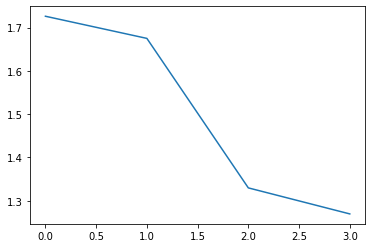

In [150]:
# Compute K-L divergence
Cm = Cv.mean(axis=1, keepdims=True).reshape(nEOF,nEOF)
m0 = np.zeros(nEOF)
m1 = np.zeros(nEOF)

kld = np.empty(td)
for ii in np.arange(td):
    kld[ii]   = ens.KLdiv(C[ii,:,:],Cm,m0,m1)
    
plt.plot(tC,kld)

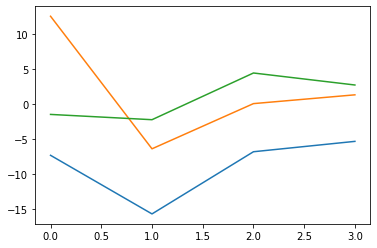

In [151]:
# Compute dominant changes to covariance
# Remove the time mean covariance
Cnm           = Cv - Cv.mean(axis=0, keepdims=True)
[uC,sC,vCt] = np.linalg.svd(Cnm, full_matrices=False)

# Plot this many PCs
pltn = 3

plt.plot(tC,(vCt[:pltn,:]*sC[:pltn,None]).T)
